In [1]:
from scipy import stats
import gsw
import matplotlib.pyplot as plt
import numpy as np

In [2]:
act_sal = [35, 35*3/4, 35*3/5, 35*3/6, 0, 35*1/3,35*1/4]
measured_con = [44.5, 35.7, 29.0, 22.7, 0.42, 16.27, 12.88]

T = np.array([[22.56,22.5,22.44], [21.0,21.0,20.94], [20.5,20.5,20.44], [20.38,20.38,20.31], [19.69,19.13,19.06],
              [20.13,20.06,20.06], [20.0,19.94,19.94]])
T_mean = T.mean(axis = 1)

print(T_mean)

calc_sal = gsw.conversions.SP_from_C(measured_con, T_mean, 0.1)
act_con = gsw.conversions.C_from_SP(act_sal, T_mean, 0)

print(calc_sal)
print(act_sal)

[22.5        20.98       20.48       20.35666667 19.29333333 20.08333333
 19.96      ]
[30.39241781 24.63889263 19.81915571 15.19541201  0.2277943  10.6401123
  8.2845139 ]
[35, 26.25, 21.0, 17.5, 0, 11.666666666666666, 8.75]


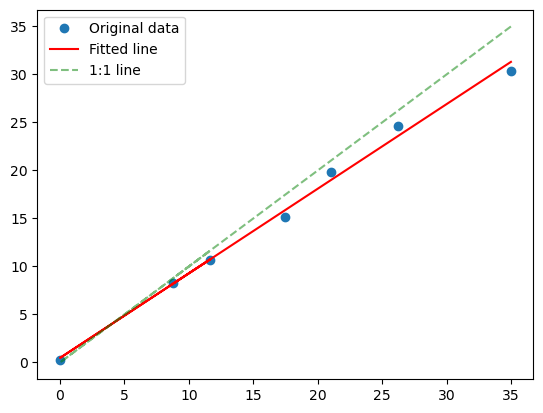

Slope:0.8810983281540886 Intercept:0.474235651768085 R-squared:0.994944615246504


In [3]:
# make a fit between act_sal_2 and calc_Sa_2
slope, intercept, r_value, p_value, std_err = stats.linregress(act_sal, calc_sal)

# Generate the fitted values
fit_values = [slope * x + intercept for x in act_sal]

# Plot the original data and the fit
plt.plot(act_sal, calc_sal, 'o', label='Original data')
plt.plot(act_sal, fit_values, 'r', label='Fitted line')
plt.plot(act_sal, act_sal, 'g--', label='1:1 line', alpha=0.5)
plt.legend()
plt.show()
print("Slope:" + str(slope), "Intercept:" + str(intercept), "R-squared:" + str(r_value**2))

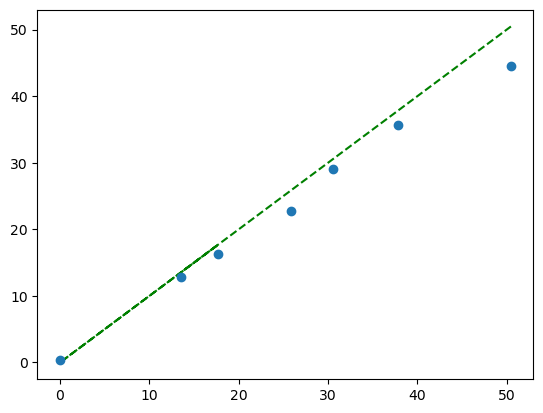

In [4]:
plt.plot(act_con, act_con, 'g--', label='Original data')
plt.plot(act_con, measured_con, 'o', label='Original data')

In [5]:
Salinity = 35
Temp_varying = np.array([[12.06,11.94],[14.13,14.0],[16.63,16.31],[17.69,17.60],[18.75,18.75]])
Temp_varying_mean = Temp_varying.mean(axis=1)
measured_con_t = [46.8,46.5,46.0,46.0,46.0]

act_con_t = gsw.conversions.C_from_SP(Salinity, Temp_varying_mean, 0)
calc_sal_t = gsw.conversions.SP_from_C(measured_con_t, 25, 0.1)

print(measured_con_t)
print(act_con_t)

[46.8, 46.5, 46.0, 46.0, 46.0]
[39.99880036 42.00099154 44.37068398 45.54259218 46.65284513]


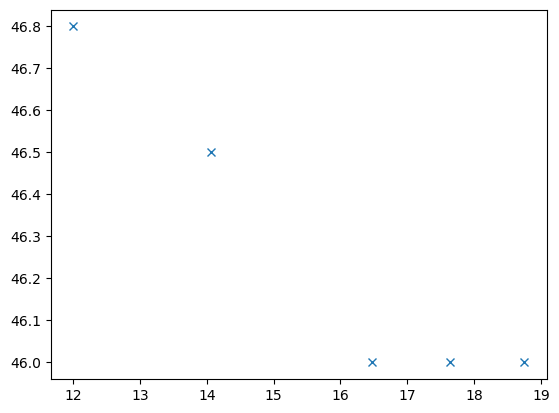

In [6]:
plt.plot(Temp_varying_mean, measured_con_t, 'x')

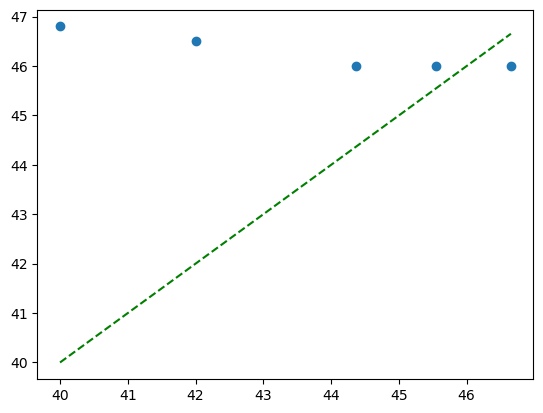

In [7]:
plt.plot(act_con_t, act_con_t, 'g--', label='Original data')
plt.plot(act_con_t, measured_con_t, 'o', label='Original data')

In [8]:
Salinity_2 = 35*1/4
Temp_varying_2 = np.array([[13.5,13.5,13.38],[20.0,19.94,19.94]])
Temp_varying_mean_2 = Temp_varying.mean(axis=1)
measured_con_t_2 = [13.07,12.88]

In [9]:
Salinities = [35, 35*3/4, 35*2/4, 35*1/4]

Temp = np.array([
    [[0.88,0.81],[4.25,4.25],[8.75,8.88],[11.88,11.89]],
    [[4.13,4.0],[7.5,7.44],[11.44,11.38],[14.31,14.25]],
    [[4.19,4.0],[8.25,8.25],[12.63,12.56],[15.5,15.38]],
    [[10.0,9.94],[12.75,12.69],[15.74,15.69],[17.63,17.56]],
])

Conductivity = np.array([
    [26.5,28.8,32.9,34.9],
    [22.4,25.0,27.5,29.3],
    [14.61,16.23,17.9,19.03],
    [9.24,9.85,10.59,11.04]
])

Temp_mean = Temp.mean(axis = 2)
print(Temp_mean)

S_calc = gsw.conversions.SP_from_C(Conductivity, Temp_mean, 0.1)

print(Salinities)
print(S_calc)

S_calc_mean = S_calc.mean(axis = 1)

print(S_calc_mean)

[[ 0.845  4.25   8.815 11.885]
 [ 4.065  7.47  11.41  14.28 ]
 [ 4.095  8.25  12.595 15.44 ]
 [ 9.97  12.72  15.715 17.595]]
[35, 26.25, 17.5, 8.75]
[[30.78907683 30.33265572 30.74421683 30.16478209]
 [23.14609757 23.60142352 23.48223471 23.3441149 ]
 [14.5216086  14.40355054 14.22433464 14.12741799]
 [ 7.46513229  7.4259918   7.43405474  7.42222232]]
[30.50768287 23.39346767 14.31922794  7.43685029]


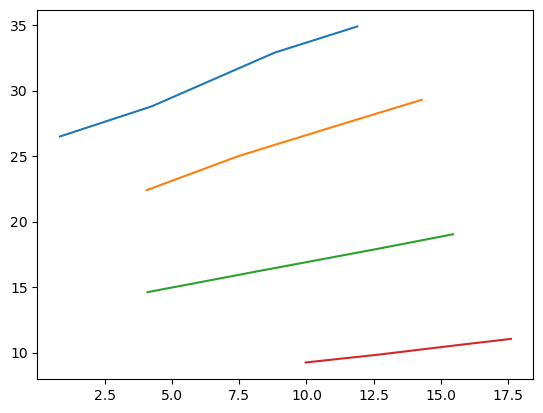

In [10]:
plt.figure()
for i in range (0,4):
    plt.plot(Temp_mean[i],Conductivity[i])

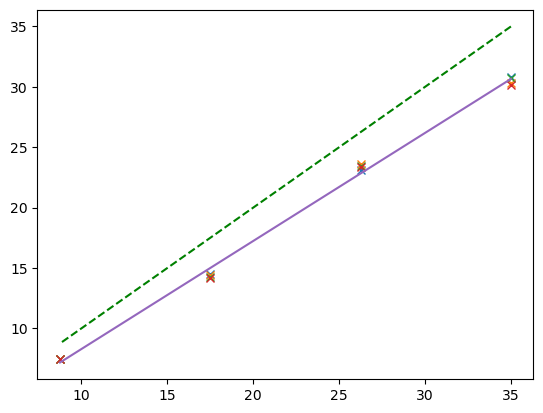

In [11]:
# make a fit between act_sal_2 and calc_Sa_2
slope, intercept, r_value, p_value, std_err = stats.linregress(Salinities, S_calc_mean)

# Generate the fitted values
fit_values = [slope * x + intercept for x in Salinities]

plt.plot(Salinities, S_calc, 'x')
plt.plot(Salinities, Salinities,'g--')
plt.plot(Salinities, fit_values)

In [12]:
def CalcSalinity(C,T):
    S = gsw.conversions.SP_from_C(C, T, 0)
    S_calibrated = (S - intercept)/slope
    return S_calibrated

print(CalcSalinity(42.3,18.45))
print(CalcSalinity(41.4,18.65))
print(CalcSalinity(31.8,7.4))

36.04999014691226
35.04608388781675
35.190304799224016


[[ 0.845  4.25   8.815 11.885]
 [ 4.065  7.47  11.41  14.28 ]
 [ 4.095  8.25  12.595 15.44 ]
 [ 9.97  12.72  15.715 17.595]]
[[30.78907683 30.33265572 30.74421683 30.16478209]
 [23.14609757 23.60142352 23.48223471 23.3441149 ]
 [14.5216086  14.40355054 14.22433464 14.12741799]
 [ 7.46513229  7.4259918   7.43405474  7.42222232]]


Text(0, 0.5, 'Salinity diff [PSU]')

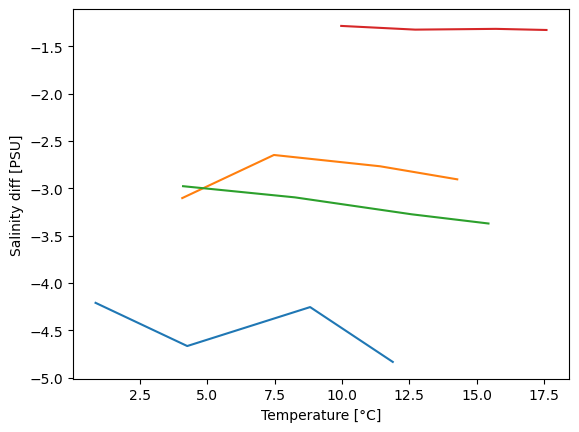

In [13]:
print(Temp_mean)
print(S_calc)


for i in range (0,4):
    plt.plot(Temp_mean[i],S_calc[i] - Salinities[i])
plt.xlabel('Temperature [°C]')
plt.ylabel('Salinity diff [PSU]')

In [14]:
###Experiment data
Tank1 = [42.3, 18.45, 36.04999014691226] #C, T, S
Tank2 = [31.8, 7.4, 35.19]

In [15]:
###Experiment data 2
Tank1 = [42.2, 18.9, CalcSalinity(42.2,18.9)] #C, T, S
Tank2 = [33.5, 10.05, 35.19]
print(Tank1)
print(Tank2)

[42.2, 18.9, 35.57525326718677]
[33.5, 10.05, 35.19]


print(CalcSalinity(43.8, 19.55))
print(CalcSalinity(34,9.4))
Uhrzeit 29.Novemeber - 14:54:00